<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/DeepLearningNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


# Binary Classification

In [0]:
# The IMDB dataset
# size: 50000      train : 25000     tets : 25000

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000 )

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
# the reviews -> vector of intergers (just simple mapping)
# the most 10000 frequent words are mapped into integers
print(train_data.shape) 
print(train_data[0])
print(len(train_data[4]))
print(len(train_data[2]))
print(train_labels.shape)
print(train_labels[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
147
141
(25000,)
1


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])

def review_decoder(words):
  review = ' '.join([reverse_word_index.get(i - 3, '?') for i in words])
  # offset by 3, since 0, 1, 2 are reserved
  return review

review_decoder(train_data[0])

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# preparing the data
# lists -> tensors
# two ways: 1. pad the lists for the same length
#           2. one-hot encode lists into 1s and 0s e.g. 10000-dimensional
# use one-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    # sets specific indices of results[i] to 1s
    results[i, sequence] = 1
  return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
X_train.shape

(25000, 10000)

In [0]:
# vectorize the labels
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [0]:
print(y_train.shape)
y_train[0]
print(np.amax(y_train))
print(np.amin(y_train))

(25000,)
1.0
0.0


In [0]:
# Model
# a hidden unit is a dimension in the representaion in the representation space
# output = relu(dot(W, input)+b)   (input_dim, ) -> d (by dot product with W)
# d increases -> more computaionally intensive & may lead to learn unwanted patterns & more complex representaion
# how many layers, how many hidden units to choose for each layer (architecture)

# 2 Dense layers with 16 hidden units, plus 1 softmax to output a probability
# define a function to create a model could be a better practice
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Conguring the optimizer, the optimizer, and the metrics
```
from keras import optimizer, losses, metrics
model.compile(optimizer=optimizer.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

```

In [0]:
# create a validation set
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0467 - acc: 0.9899 - val_loss: 0.3958 - val_acc: 0.8792
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0392 - acc: 0.9915 - val_loss: 0.4274 - val_acc: 0.8690
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0304 - acc: 0.9949 - val_loss: 0.4468 - val_acc: 0.8701
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0255 - acc: 0.9949 - val_loss: 0.4706 - val_acc: 0.8734
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0179 - acc: 0.9975 - val_loss: 0.5099 - val_acc: 0.8665
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0170 - acc: 0.9968 - val_loss: 0.5329 - val_acc: 0.8690
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0111 - acc: 0.9989 - val_loss: 0.5633 - v

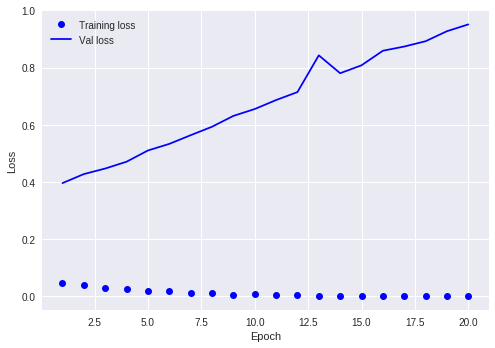

In [0]:
# visualization
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

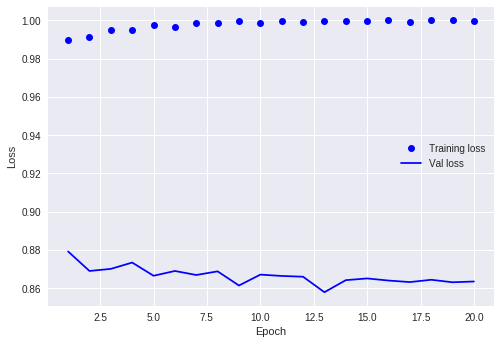

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4,batch_size=512, validation_data=(x_val, y_val))
# evaluate on test set
results = model.evaluate(X_test, y_test)


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 127us/step - loss: 0.5297 - acc: 0.7917 - val_loss: 0.3981 - val_acc: 0.8664
Epoch 2/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.3180 - acc: 0.9011 - val_loss: 0.3091 - val_acc: 0.8867
Epoch 3/4
15000/15000 [==============================] - 2s 108us/step - loss: 0.2319 - acc: 0.9251 - val_loss: 0.2786 - val_acc: 0.8903
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step


In [0]:
print(results)

[0.29365855650424955, 0.8818]


In [0]:
# generate predictions on new data
predictions = model.predict(X_test)
print(predictions.shape)
print(predictions)

(25000, 1)
[[0.31274527]
 [0.99851286]
 [0.88471806]
 ...
 [0.09784046]
 [0.17051432]
 [0.4878007 ]]


# Multiclass Classification

The build in way
```
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
```

In [0]:
# The Reuters dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

In [0]:
import numpy as np
import keras
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


In [0]:
x_val = x_train[:1000]
partila_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [52]:
history = model.fit(partila_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8

In [0]:
# visualization
import matplotlib.pyplot as plt

def plot_loss(history):
  history_dict = history.history
  loss = history_dict['loss']
  #val_loss = history_dict=['val_loss'] 
  val_loss = history_dict['val_loss']
  assert len(loss) == len(val_loss)
  
  epochs = range(1, len(loss)+1)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  
def plot_acc(history):
  history_dict = history.history
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  
  epochs = range(1, len(acc)+1)
  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

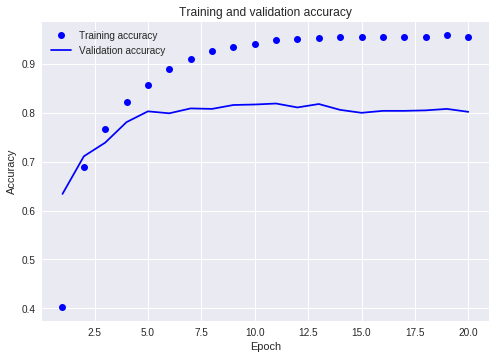

In [54]:
plot_acc(history)

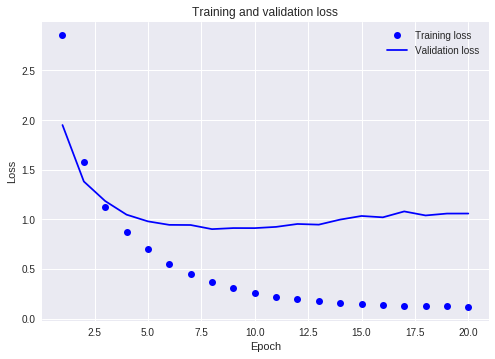

In [55]:
plot_loss(history)

In [57]:
# The network begins to overfit after nine epochs
history = model.fit(partila_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 106us/step - loss: 2.6434 - acc: 0.5253 - val_loss: 1.7688 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.4293 - acc: 0.7088 - val_loss: 1.3315 - val_acc: 0.6980
Epoch 3/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.0527 - acc: 0.7844 - val_loss: 1.1422 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.8196 - acc: 0.8317 - val_loss: 1.0438 - val_acc: 0.7710
Epoch 5/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.6520 - acc: 0.8644 - val_loss: 0.9768 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.5182 - acc: 0.8944 - val_loss: 0.9237 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.4165 - acc: 0.9139 - val_loss: 0.8967 - val_acc: 0.8110
Epoch 8/9
798

In [59]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 124us/step
[0.9738257716833643, 0.7827248441674087]


In [60]:
# the accuracy of a purely random classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.20169189670525378

In [62]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))

3


A diiferent way to handle the labels and the loss

**cast them as an integer tensor**

In [64]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(8982,)
(2246,)
3


**The only thing this approach would change is the choice of the loss function.**

**categorical_crossentropy** expects the labels to follow **a categorical encoding.**

**sparce_categorical_crossentropy** expects **integer labels.**

just different interface, but mathematically the same


In [0]:
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(4, activation = 'relu'))
  model.add(layers.Dense(46, activation='softmax'))
  return model

model = create_model()


model.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [0]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [72]:
hist = model.fit(partial_x_train, partial_y_train, epochs=20,
                batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/step - loss: 3.1938 - acc: 0.2061 - val_loss: 2.5442 - val_acc: 0.3730
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 2.1180 - acc: 0.4672 - val_loss: 1.8125 - val_acc: 0.5780
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.6260 - acc: 0.6101 - val_loss: 1.5873 - val_acc: 0.6210
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.4311 - acc: 0.6419 - val_loss: 1.4989 - val_acc: 0.6350
Epoch 5/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.3036 - acc: 0.6582 - val_loss: 1.4543 - val_acc: 0.6340
Epoch 6/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.2126 - acc: 0.6551 - val_loss: 1.4237 - val_acc: 0.6250
Epoch 7/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.1285 - acc: 0.6543 - val_loss: 1.4086 - val_acc: 0.6220
Epoch 

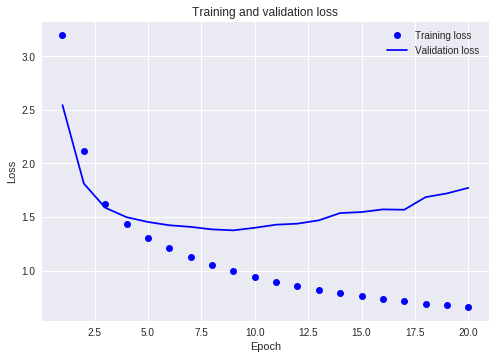

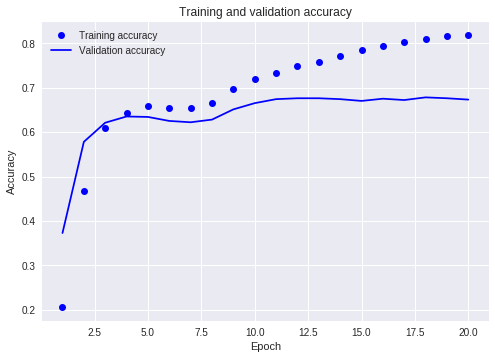

In [74]:
plot_loss(hist)
plot_acc(hist)

# Regression Example